In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
from model import Net
from train import train

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
train_loader = torch.utils.data.DataLoader(training_data, batch_size=128, shuffle=True, num_workers=8)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=True, num_workers=8)

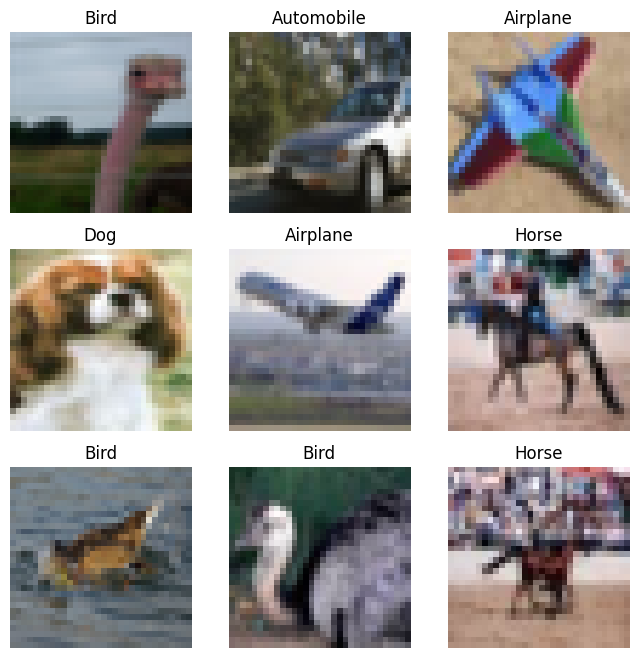

In [5]:
labels_map = {
    0: "Airplane",
    1: "Automobile",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0))
plt.show()

In [6]:
training_data.data.shape

(50000, 32, 32, 3)

In [7]:
train_loader.dataset.data.shape

(50000, 32, 32, 3)

In [ ]:
net = Net().to(device)

In [ ]:
EPOCHS = 100
lr = 0.01
optimizer = optim.Adam(net.parameters(), lr=lr, weight_decay = 0.005)
criterion = nn.CrossEntropyLoss()